In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Predict Housing Prices

This project is based on 79 variables to predict the the housing prices in Ames, Iowa

In [2]:
# To automatically reload modules defined in external files. 
%reload_ext autoreload
%autoreload 2

# To display plots directly in the notebook:
%matplotlib inline

In [3]:
# Reads in the csv-files and creates a dataframe using pandas
train = pd.read_csv(r'C:\Users\Bernt\dat158-ml-course21\data2\train.csv')
test = pd.read_csv(r'C:\Users\Bernt\dat158-ml-course21\data2\test.csv')
sampleSubmission = pd.read_csv(r'C:\Users\Bernt\dat158-ml-course21\data2\sample_submission.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# We do not include no-numerical values and features with null values
features = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 
    'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
    'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
    'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalesPrice'
]


features_minus_null = [
    'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 
    'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
    'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
    'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'
]

y = train['SalePrice']
X = train[features_minus_null]

In [6]:
X.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# LotFontage has 259 null values



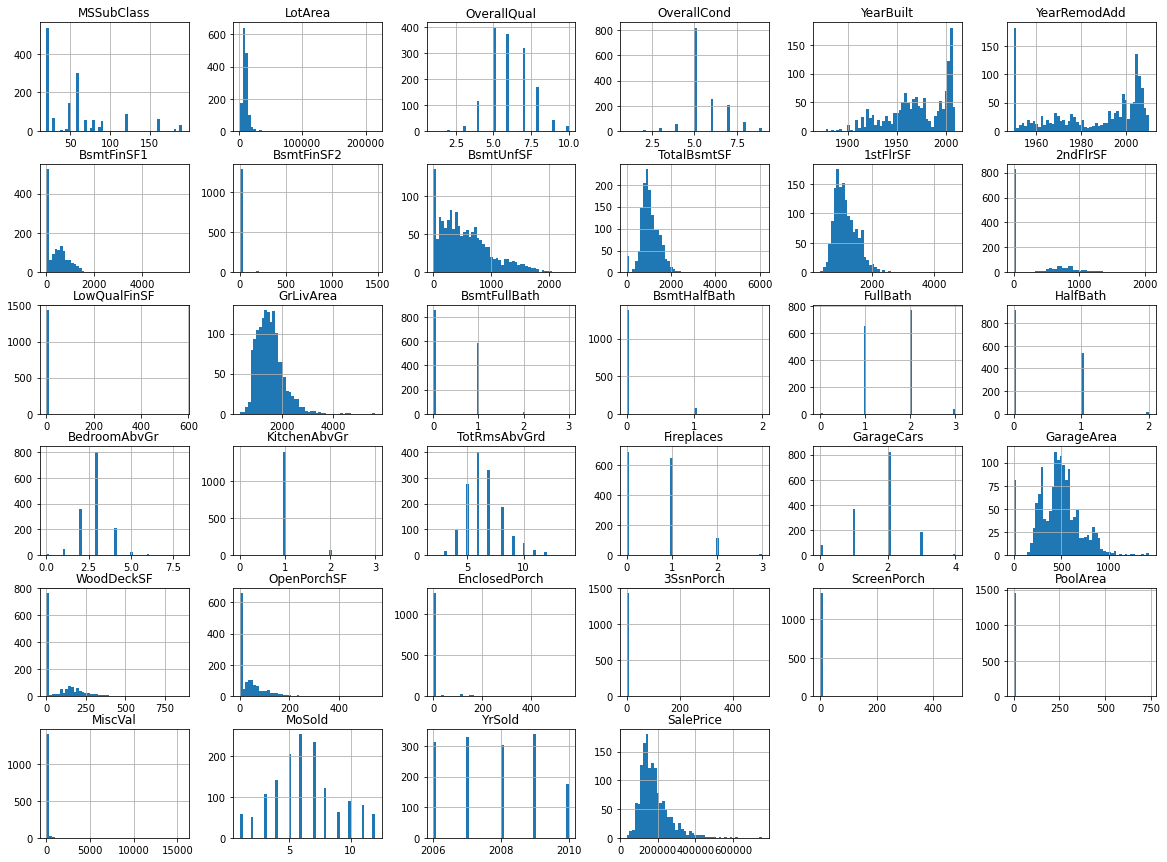

In [8]:
X.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

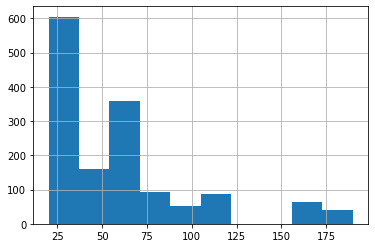

In [9]:
X['MSSubClass'].hist()

In [10]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X, y)

RandomForestRegressor()

In [11]:
from sklearn.metrics import mean_squared_error

predictions = forest_reg.predict(X)
forest_mse = mean_squared_error(y, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1515.6996553683139

### Pycaret Setup

In [12]:
from pycaret.regression import *

data = setup(data=train, target='SalePrice')

,Description,Value
0,session_id,6549
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 408)"


### Select Best Models

In [13]:
# We select the 4 best models 
best_models = compare_models(n_select=4, sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,17634.2502,913868830.4417,29200.1838,0.8453,0.1445,0.1041,0.6230
lightgbm,Light Gradient Boosting Machine,18223.0885,1008897204.9726,30561.3620,0.8326,0.1520,0.1070,0.3660
omp,Orthogonal Matching Pursuit,17263.2995,1237879045.2084,31148.0833,0.7670,0.1426,0.1016,0.0310
rf,Random Forest Regressor,19166.2360,1133677801.3471,32460.5807,0.8099,0.1627,0.1143,1.5800
lasso,Lasso Regression,19702.2589,1398091811.3831,34083.6262,0.7316,0.1791,0.1219,0.1910
ridge,Ridge Regression,19603.8709,1343777426.7994,34376.8585,0.7513,0.1753,0.1163,0.0560
ada,AdaBoost Regressor,24371.7335,1341588676.2557,36014.1187,0.7733,0.2029,0.1590,0.4860
et,Extra Trees Regressor,21908.2084,1382065724.4290,36136.3894,0.7621,0.1816,0.1288,1.8960
en,Elastic Net,21413.7210,1617972362.6944,37208.1399,0.7166,0.1693,0.1255,0.2000
lr,Linear Regression,23190.8001,1738102631.8722,39339.5863,0.6630,0.2448,0.1460,0.9280


In [14]:
best_models

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6549, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               ra

### Hyperparameter Tuning

In [15]:
best = create_model(best_models[0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16429.2732,528008337.8958,22978.4320,0.8786,0.1622,0.1192
1,17044.1553,630146432.3047,25102.7176,0.8737,0.1170,0.0890
2,16464.2079,644190605.6570,25380.9103,0.9184,0.1101,0.0840
3,23203.9963,2322114940.8742,48188.3278,0.8098,0.1451,0.1012
4,16664.3262,609222013.1761,24682.4232,0.8590,0.1348,0.0996
5,16143.6926,807141940.6365,28410.2436,0.8811,0.1179,0.0791
6,20798.0700,1117736872.4630,33432.5720,0.7888,0.1787,0.1307
7,15309.0828,466975463.5459,21609.6151,0.9140,0.1529,0.1080
8,17013.1459,1394368546.8847,37341.2446,0.6522,0.1665,0.1145
9,17272.5517,618783150.9786,24875.3523,0.8779,0.1600,0.1155


In [16]:
tuned_best = tune_model(best, optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16231.2446,547826360.0582,23405.6908,0.8740,0.1668,0.1200
1,18126.0074,747438903.9346,27339.3289,0.8502,0.1264,0.0937
2,18477.8681,788604323.9809,28082.0997,0.9001,0.1234,0.0943
3,25658.2548,3203978370.0221,56603.6957,0.7376,0.1673,0.1074
4,16095.5514,618705459.2918,24873.7906,0.8568,0.1399,0.0968
5,15672.9674,734325607.3157,27098.4429,0.8918,0.1139,0.0799
6,20289.4919,1336867893.1525,36563.2041,0.7474,0.1859,0.1295
7,15878.0727,523470821.4362,22879.4847,0.9036,0.1575,0.1113
8,16791.1351,934322111.8097,30566.6830,0.7669,0.1582,0.1136
9,15938.0359,509722342.2509,22577.0313,0.8994,0.1721,0.1171


### Combine Models

In [17]:
combined = blend_models(estimator_list=best_models[1:3])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13072.5362,383212197.8893,19575.8064,0.9119,0.1400,0.0946
1,13993.7835,425330446.8359,20623.5411,0.9147,0.0952,0.0728
2,15205.7515,524982028.5848,22912.4863,0.9335,0.1044,0.0805
3,20095.4254,1581559563.9656,39768.8265,0.8705,0.1233,0.0864
4,15802.0137,473741738.7703,21765.6091,0.8904,0.1299,0.0971
5,14966.8171,699070162.2758,26439.9350,0.8970,0.1038,0.0740
6,20879.9146,2709178985.6874,52049.7741,0.4881,0.1956,0.1287
7,13730.2091,369229029.5829,19215.3332,0.9320,0.1367,0.0944
8,16610.6043,1707078549.1950,41316.8071,0.5742,0.1639,0.1081
9,14329.5606,435221507.5550,20861.9632,0.9141,0.1301,0.0935


### Plot Models

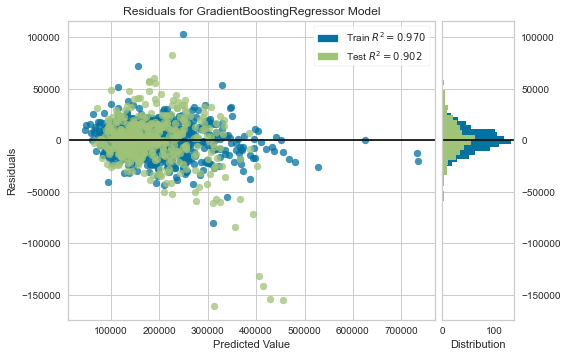

In [18]:
# the none-tuned, none-combined version performs slightly better
plot_model(best)

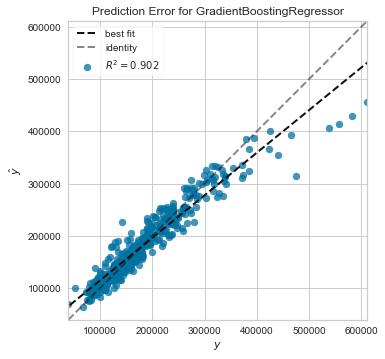

In [19]:
plot_model(best, plot='error')

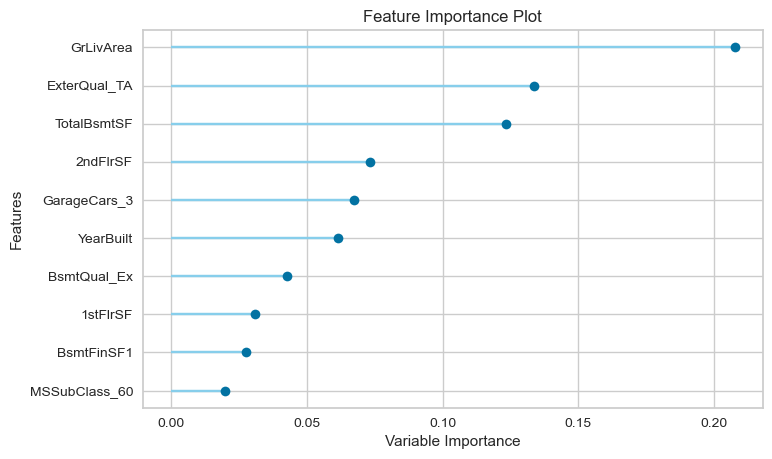

In [20]:
plot_model(best, plot='feature')

In [21]:
predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,16182.8741,656176505.5438,25615.9424,0.9015,0.1235,0.0912


In [23]:
test_prediction = predict_model(best, data=test)

In [24]:
test_prediction

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,124326.164954
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,163235.049844
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183864.986254
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,191060.950295
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,183226.906467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,91593.319530
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,99207.834482
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,168575.105111
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,137599.935727
